# Scipy

Basic functions of the `scipy` library.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Optimization

In [2]:
from scipy.optimize import minimize

Minimize some function.
For example:

$$ f(x) = x^2 + 10 \sin(x) $$

Minimum at x=[-1.30644012]


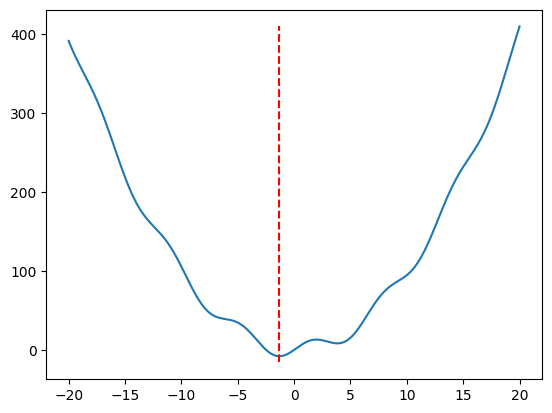

In [17]:
# Define the function to be minimized
def f(x):
	return x**2 + 10*np.sin(x)

result = minimize(f, x0=0)
print(f"Minimum at x={result.x}")

# Plot the function
x = np.linspace(-20, 20, 500)
y = f(x)

plt.plot(x, y)
plt.vlines(result.x, ymin=y.min()*2, ymax=y.max(), color='red', linestyle='dashed')
plt.show()

Minimize a function with constraints.
For example:

$$ f(x, y) = x^2 + y^2 $$

Subject to:

$$ x + y = 1 $$
$$ y \geq 0 $$
$$ x \geq 0 $$